<a href="https://colab.research.google.com/github/Yamashitast/DeepLearning2022Late/blob/main/DogVsCat2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kerasを使用したディープラーニングをやってみる
##画像認識を行う

###ライブラリの読み込み

In [11]:
%matplotlib inline
from keras.applications.vgg16 import VGG16,preprocess_input,decode_predictions
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import sys

###学習済みモデルの読み込み

In [12]:
model=VGG16(weights='imagenet')

###画像判定のための関数

In [13]:
def predict(filename,featuresize):
  img=image.load_img(filename,target_size=(224,224))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  #学習モデルで判定を実行
  preds=model.predict(preprocess_input(x))
  results=decode_predictions(preds,top=featuresize)[0]
  return results
#関数終わり

###画像表示のための関数

In [14]:
def showimg(filename,title,i):
  im=Image.open(filename)#画像ファイルを開く
  im_list=np.array(im)#画像ビットデータをndarrayにする
  plt.subplot(2,5,i)
  plt.title(title)
  plt.axis("off")
  plt.imshow(im_list)
#関数終わり

###Kaggeにある画像データを利用する
https://www.kaggle.com/
<br>犬猫判定用の画像データ<br>
https://www.kaggle.com/c/dogs-vs.cats/data

##指定されたURLからファイルをダウンロードする

In [15]:
#wgetでwebからファイルをダウンロードする
#Googlecolabでコマンドを実行するときは、先頭に！マークを必ずつけること
!wget 
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O train.zip && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O test.zip && rm -rf /tmp/cookies.txt


wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.
--2022-10-04 01:07:43--  https://drive.google.com/uc?export=download&confirm=t&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2
Resolving drive.google.com (drive.google.com)... 172.217.218.139, 172.217.218.100, 172.217.218.138, ...
Connecting to drive.google.com (drive.google.com)|172.217.218.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fjptd0f21brgtfgnjmkqc9lri2karvgv/1664845650000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=2f72af74-2717-4f05-9004-bb6f3e45a7a9 [following]
--2022-10-04 01:07:43--  https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fjptd0f21brgtfgnjmkqc9lri2karvgv/1664845650000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=2f72af74-2717-4f05-9004-bb6f3e45a7a9
Resolvin

##Colabに自分のGoogleアカウントのドライブをマウントする

In [16]:
#googleドライブを操作するモジュールをimport
from google.colab import drive
#googleドライブをマウント
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##DLしてきたファイルをマウントしたディレクトリにコピーする

In [17]:
#コピーファイルを置くディレクトリを作る
import os
dir_path="/content/drive/My Drive/2022LATE"
#すでにディレクトリがあってもエラーにしない
os.makedirs(dir_path,exist_ok=True)
!pwd #今いるディレクトリを表示
#ファイルをコピー
!cp train.zip "/content/drive/My Drive/2022LATE"
#test.zipはいったん使わないのでコピーしない

/content


##Googleドライブからcolabへファイルをコピー

In [18]:
!cp "/content/drive/MyDrive/2022LATE/train.zip"

cp: missing destination file operand after '/content/drive/MyDrive/2022LATE/train.zip'
Try 'cp --help' for more information.


##zipファイルを解凍する

In [19]:
#unzipコマンドで解凍
!unzip -o -q "train.zip"
print("zip解凍完了")

zip解凍完了


##解凍した画像を使って画像判定させる

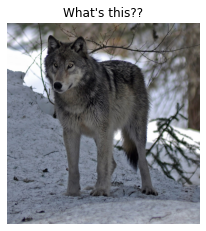

('n02114367', 'timber_wolf', 0.7778685)
('n02114855', 'coyote', 0.11393244)
('n02114712', 'red_wolf', 0.091270946)
('n02114548', 'white_wolf', 0.013618014)
('n02115641', 'dingo', 0.0023541476)
('n02120505', 'grey_fox', 0.00045281043)
('n02115913', 'dhole', 0.0004138525)
('n02110063', 'malamute', 3.2584416e-05)
('n02109961', 'Eskimo_dog', 2.5132864e-05)
('n02110185', 'Siberian_husky', 8.007063e-06)


In [21]:
#画像を指定する変数
filename="/content/drive/MyDrive/2022LATE/wolf.jpg"
plt.figure(figsize=(20,10))
for i in range(1):
  showimg(filename,"What's this??",i+1)
#ループ終わり
plt.show()

#表示した画像を判定
results=predict(filename,10)
for result in results:
  print(result)